# Opdracht model-evaluatie

In [66]:
from sklearn.datasets import load_breast_cancer
import numpy as np

seed = 314

## Opdracht 1

Laad [de borstkanker-dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
) en maak gebruik van `DESCR` om een beeld te krijgen van de gegevens die in deze dataset zijn opgeslagen. zorg ervoor dat je de *features* in een variabele `X` krijgt en de *targets* in de variabele `y` (dit kan op minimaal twee manieren). Je hoeft voor deze opgave geen EDA te maken of de data helemaal op te schonen (mag natuurlijk wel).

Je hoeft het niet allemaal in één cel te doen; voel je vrij om meer cellen aan te maken wanneer je dat wilt.

In [67]:
X, y = load_breast_cancer(return_X_y=True)

Maak een [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) met de standaard-waarden voor alle parameters. Geef dit model mee aan `plot_learning_curve` die in `helpers.py` te vinden is. Behalve dit model verwacht die methode eveneens een titel, de `X` en de `y`. De volledige signature van die methode staat hieronder; bestudeer eventueel [de code](helpers.py) om de volledige implementatie te zien.

```
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5),
)
```

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.11/site-packages/matplotlib/pyplot.py'>

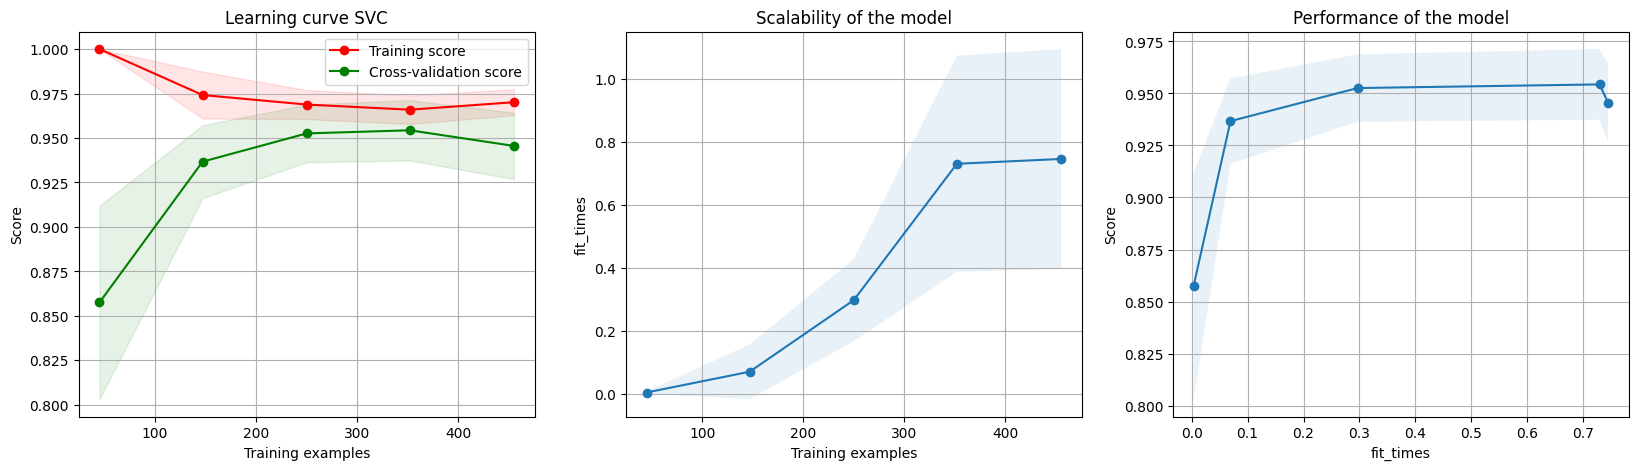

In [68]:
from sklearn.svm import SVC
from helpers import plot_learning_curve

model = SVC(
    kernel='linear',
    degree=3,
    random_state=seed
)
plot_learning_curve(estimator=model, X=X, y=y, title='Learning curve SVC')



Als het goed is, heb je nu hierboven drie grafieken staan. Bedenk op basis van deze visualisatie hoe goed of hoe slecht je vindt dat je *classifier* werkt.

Experimenteer vervolgens met verschillende waarden voor de parameters van die `SVC`: verander de kernel en verhoog (als je kernel `poly` is) de `degree`.  Welke verschillen zie je in de visualisatis? Kun je op basis hiervan een voorstel doen voor de beste waarden voor die parameters?

Maak gebruik van [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) om de data op te splitsen in tachtig procent trainingsdata en twintig procent testdata.

Train een `SVC` op basis van de beste parameters die je hierboven hebt geïdentificeerd. Maak vervolgens een [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) en een [classificatie-raport](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) op basis van de testdata met dit model. Maak tenslotte [een ROC-curve](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) van dit getrainde model. 

Geef op basis hiervan een analyse van de kwaliteit van het model en een advies over hoe het model eventueel te verbeteren zou zijn.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [70]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

model.fit(X_train, y_train)


SVC(kernel='linear', random_state=314)

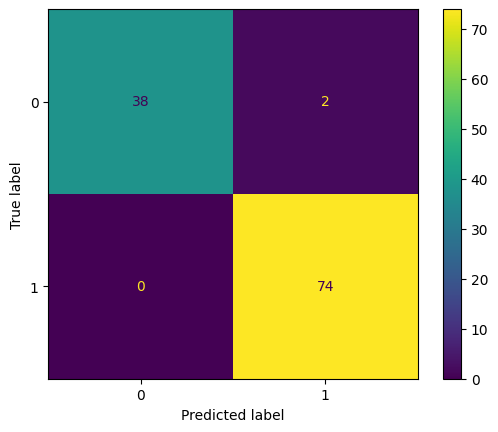

In [71]:
# Plot een confusion-matrix.
# Maak gebruik van de klasse ConfusionMatrixDisplay die hierboven is geïmporteerd

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [72]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


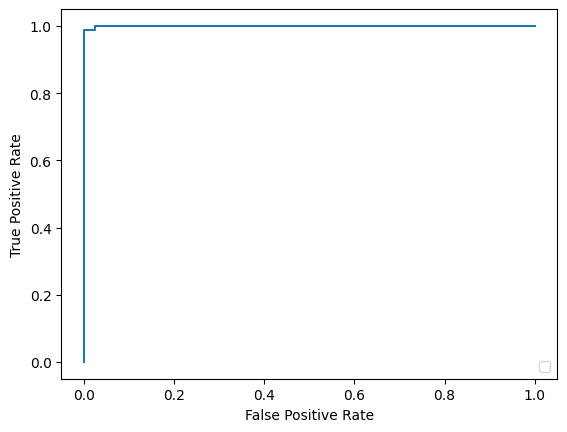

In [73]:
# Plot een ROC-curve.
# Maak gebruik van de klasse RocCurveDisplay die hierboven is geïmporteerd

y_pred_proba = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()
plt.show()

## Opdracht 2

Maak en train nu verschillende andere typen *classifiers* (een aantal is hieronder gegeven, maar voel je vrij om een andere set te gebruiken). Let op: alle *classifiers* in sklearn implementeren dezelfde interface: maak hiervan gebruik in je realisatie.

In de cel hieronder wordt een *DataFrame* `result_table` gedefinieerd. Het is de bedoeling dat je van alle *classifiers* die je gebruikt en traint de `fpr`, de `tpr` en de `auc` in dit *DataFrame* opslaat. Je kunt hiervoor gebruik maken van de sklearn-methoden [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) en [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). 

In [78]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# DataFrame om de gevonden metrieken per classifier in op te slaan.
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table.loc[len(result_table)] = [cls.__class__.__name__, fpr, tpr, auc]
    


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'DataFrame' object has no attribute 'append'

In de cel hieronder wordt de variabele `result_table` gebruikt om de verschillende ROC's in één figuur te plotten. Je hoeft hiervoor niks te programmeren; als je de cel runt krijgt je als het goed is direct de juiste visualisatie. 

Kun je op basis van deze visualisatie een uitspraak doen over welk model de beste performance heeft voor deze dataset? 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


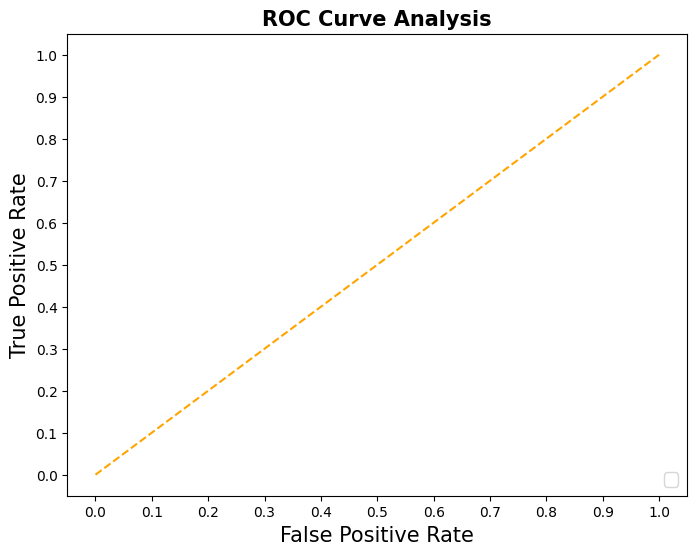

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label=f"{i}, AUC={result_table.loc[i]['auc']:.3f}")
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()